In [ ]:
import pandas as pd

#read in the data for Chase's stock history
df = pd.read_csv('JPM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,5.129630,5.018519,5.037037,1.098446,62775
1,1980-03-18,0.000000,5.111111,5.037037,5.074074,1.106524,64125
2,1980-03-19,0.000000,5.166667,5.111111,5.148148,1.122677,40500
3,1980-03-20,0.000000,5.148148,5.092593,5.111111,1.114601,18900
4,1980-03-21,0.000000,5.222222,5.111111,5.222222,1.138831,97200
...,...,...,...,...,...,...,...
10952,2023-08-24,147.500000,149.410004,146.990005,147.229996,147.229996,6534000
10953,2023-08-25,147.279999,148.619995,145.850006,147.050003,147.050003,6694800
10954,2023-08-28,147.570007,148.610001,147.130005,147.559998,147.559998,5094100
10955,2023-08-29,147.710007,148.850006,147.179993,148.759995,148.759995,6337000


In [ ]:
# set the dataframe to only contain the columns of Date and Close
df = df[['Date', 'Close']]
df

,Date,Close
0,1980-03-17,5.037037
1,1980-03-18,5.074074
2,1980-03-19,5.148148
3,1980-03-20,5.111111
4,1980-03-21,5.222222
...,...,...
10952,2023-08-24,147.229996
10953,2023-08-25,147.050003
10954,2023-08-28,147.559998
10955,2023-08-29,148.759995


In [ ]:
df['Date']

0        1980-03-17
1        1980-03-18
2        1980-03-19
3        1980-03-20
4        1980-03-21
            ...    
10952    2023-08-24
10953    2023-08-25
10954    2023-08-28
10955    2023-08-29
10956    2023-08-30
Name: Date, Length: 10957, dtype: object

In [ ]:
import datetime

# function to convert the string to datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_obj = str_to_datetime('1980-03-17')
datetime_obj

datetime.datetime(1980, 3, 17, 0, 0)

In [ ]:
# convert all date strings to datetime
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-109-0ee41b87adf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-03-17
1       1980-03-18
2       1980-03-19
3       1980-03-20
4       1980-03-21
           ...    
10952   2023-08-24
10953   2023-08-25
10954   2023-08-28
10955   2023-08-29
10956   2023-08-30
Name: Date, Length: 10957, dtype: datetime64[ns]

In [ ]:
# set the Date to be the index
df.index = df.pop('Date')
df

,Close
Date,
1980-03-17,5.037037
1980-03-18,5.074074
1980-03-19,5.148148
1980-03-20,5.111111
1980-03-21,5.222222
...,...
2023-08-24,147.229996
2023-08-25,147.050003
2023-08-28,147.559998


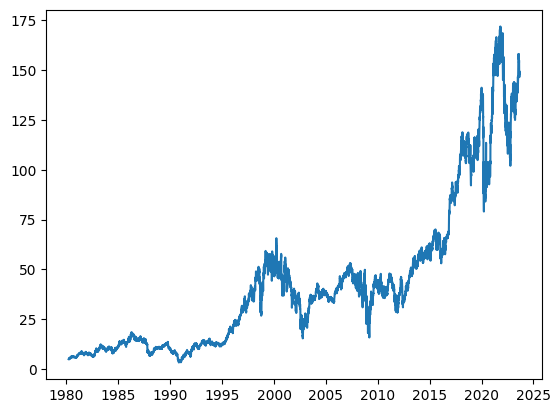

In [ ]:
import matplotlib.pyplot as plt
# plot the stock price
plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,150.970001,149.460007,150.619995,152.550003
1,2021-03-26,149.460007,150.619995,152.550003,155.089996
2,2021-03-29,150.619995,152.550003,155.089996,152.679993
3,2021-03-30,152.550003,155.089996,152.679993,154.479996
4,2021-03-31,155.089996,152.679993,154.479996,152.229996
...,...,...,...,...,...
247,2022-03-17,130.169998,132.479996,138.399994,140.149994
248,2022-03-18,132.479996,138.399994,140.149994,140.100006
249,2022-03-21,138.399994,140.149994,140.100006,139.649994
250,2022-03-22,140.149994,140.100006,139.649994,142.619995


In [ ]:
def windowed_data_to_date_X_y(windowed_df):
    df_as_np = windowed_df.to_numpy()
    dates = df_as_np[:, 0]
    mid_matrix = df_as_np[:, 1:-1]
    X = mid_matrix.reshape(len(dates), mid_matrix.shape[1], 1)
    Y = df_as_np[:,-1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_data_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

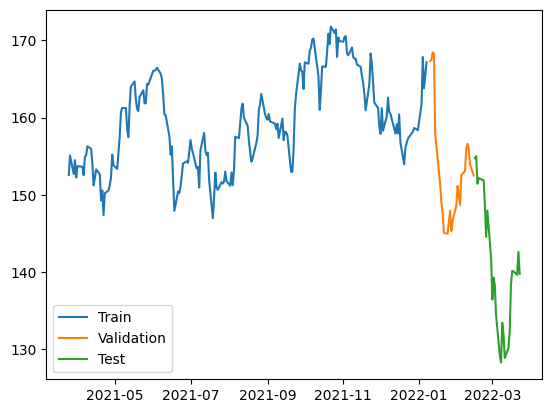

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Input((3, 1)),
                    tf.keras.layers.LSTM(64),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1)])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 103ms/step - loss: 25351.1270 - mean_absolute_error: 159.1085 - val_loss: 23338.5957 - val_mean_absolute_error: 152.5951
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 25129.9473 - mean_absolute_error: 158.4121 - val_loss: 23142.3750 - val_mean_absolute_error: 151.9509
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 24913.8125 - mean_absolute_error: 157.7276 - val_loss: 22901.6426 - val_mean_absolute_error: 151.1564
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 24634.4258 - mean_absolute_error: 156.8394 - val_loss: 22577.5547 - val_mean_absolute_error: 150.0805
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 24256.7812 - mean_absolute_error: 155.6313 - val_loss: 22154.5820 - val_mean_absolute_error: 148.6646
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 23774.1562 - mean_absolute_error: 154.0713 - val_loss: 21

7/7 [==============================] - 1s 3ms/step


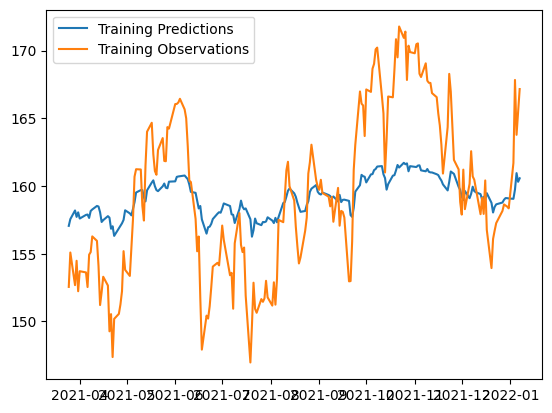

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 102ms/step


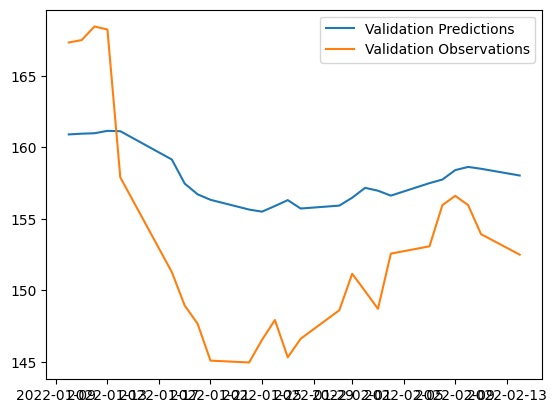

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 26ms/step


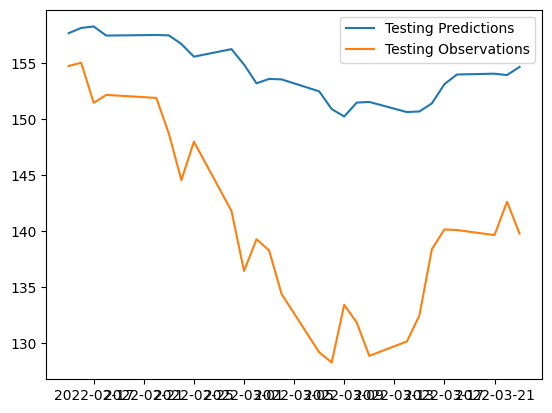

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

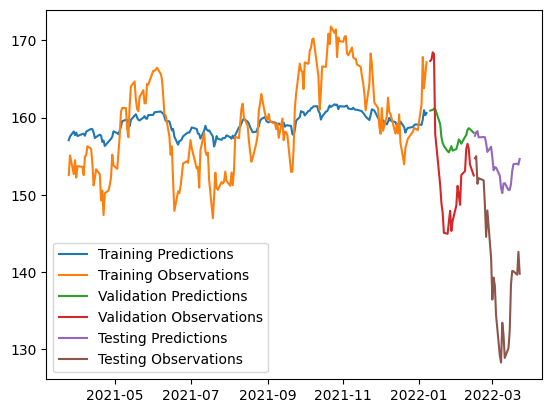

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 22ms/step


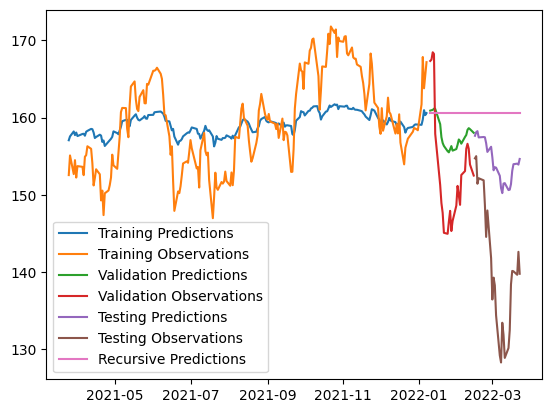

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])